# Black Scholes  methods 
The Black-Scholes model, aka the Black-Scholes-Merton (BSM) model, is a differential equation widely used to price options contracts.

The Black-Scholes model requires five input variables: the strike price of an option, the current stock price, the time to expiration, the risk-free rate, and the volatility.

Though usually accurate, the Black-Scholes model makes certain assumptions that can lead to predictions that deviate from the real-world results.

The standard BSM model is only used to price European options, as it does not take into account that American options could be exercised before the expiration date.
## Contents
   - [European option](#sec1)
      - [Put-Call parity](#sec1.1)
   - [Numerical integration](#sec2)
   - [Monte Carlo method](#sec3)
   - [Binomial tree](#sec4)
   - [Limits of the model](#sec5)

In [10]:
import All_functions_for_risk as risk
%run 'All_functions_for_risk.py'


/Users/rutzzz/Risk Management/All_functions_for_risk.py:34: DeprecationWarning: Please use `LinAlgError` from the `scipy.linalg` namespace, the `scipy.linalg.misc` namespace is deprecated.
  from scipy.linalg.misc import LinAlgError


## European Option Pricing in the Black-Scholes Model


### Black-Scholes Formula for European Call Options

The valuation formula for a European call option within the Black-Scholes framework is given by:

$$
C(t,T,S,K,r,\sigma) = S \, N(d_1) - K e^{-r(T-t)} N(d_2)
$$

where

$$
d_1 = \frac{1}{\sigma \sqrt{T-t}} \left[ \log \left( \frac{S}{K} \right) + \left(r + \frac{\sigma^2}{2} \right) (T-t) \right] \quad \text{and} \quad d_2 = d_1 - \sigma \sqrt{T-t}
$$

and $N$ represents the cumulative distribution function of a standard normal random variable.


### Option Valuation as Discounted Expectation

The value of an option can also be expressed as the discounted expectation of the future payoff:

$$
C(s,K,t, T) = e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}\left[ (S_T - K)^+ \mid S_t=s \right]
            = e^{-r(T-t)} \int_0^{\infty} (s' - K)^+ f(s'|s) \, ds'
            = e^{-r(T-t)} \int_K^{\infty} (s' - K) f(s'|s) \, ds'
$$

where $f(s'|s)$ denotes the risk-neutral transition probability density function of the stock price process $\{S_u\}_{u \in [t,T]}$, starting at $S_t = s$. This function is characterized by a log-normal distribution:

$$
f(s'|s) = \frac{1}{s' \sigma \sqrt{2\pi (T-t)}} \exp\left(- \frac{ \left[\log(s') - \left(\log(s) + (r-\frac{1}{2} \sigma^2)(T-t) \right) \right]^2}{2\sigma^2 (T-t)}\right)
$$

### Notational Conventions

In statistical literature, random variables are typically denoted by capital letters, while non-random variables are represented by lowercase letters. However, in the context of the Black-Scholes model, it is common practice to use capital letters for certain variables such as the stock price (S), strike price (K), and maturity (T), even when they are not random. The notation $S_0$ is often used to denote the initial stock price, which is usually a fixed variable.


### In-Depth Analysis of the Black-Scholes Formula

The Black-Scholes formula for a European call option can be dissected further to gain a deeper understanding of its components:

\begin{align*}
 C(s,t,K,T) &= e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}\left[ (S_T - K)^+ \mid S_t=s \right] \\
            &= e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}\left[ S_T \mathbb{1}_{S_T >K} \mid S_t=s \right] 
              - e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}\left[ K \mathbb{1}_{S_T >K} \mid S_t=s \right] \\
            &= e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}\left[ S_T \mathbb{1}_{S_T >K} \mid S_t=s \right] 
              - e^{-r(T-t)} K \, \underbrace{\mathbb{Q}\left[ S_T >K \mid S_t=s \right]}_{N(d_2)} \\            
\end{align*}

To facilitate further analysis, we introduce a change of measure under the stock numeraire:

$$ \begin{aligned}
\frac{d \tilde{\mathbb{Q}} }{ d \mathbb{Q} } &= \frac{S_T}{\mathbb{E}^\mathbb{Q}[S_T | S_t]} = \frac{S_T}{S_t e^{r(T-t)}}  \\ 
                                            &= \frac{S_t e^{(r -\frac{1}{2}\sigma^2)(T-t) + \sigma W_{T-t}} }{S_t e^{r(T-t)}} \\
                                            &=   e^{ -\frac{1}{2}\sigma^2(T-t) + \sigma W_{T-t} } \quad \text{(exponential martingale)} 
\end{aligned} $$

By the [Girsanov theorem], under the measure $\tilde{\mathbb{Q}}$, the driving Brownian motion has the new dynamics:

$$ \tilde{W_t} = W_t - \sigma t $$

The stock dynamics under this new measure become:

$$\begin{aligned}
 \frac{dS_t}{S_t} &= r dt + \sigma dW_t \\
                  &= (r+\sigma^2) dt + \sigma d\tilde{W}_t 
\end{aligned}$$

The first term in the option pricing formula can be rewritten as:

$$ \begin{aligned}
 e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}}\left[ S_T \mathbb{1}_{S_T >K} \mid S_t=s \right] &= e^{-r(T-t)} \mathbb{E}^{\tilde{\mathbb{Q}}} 
                 \left[ \frac{d \mathbb{Q} }{ d \tilde{\mathbb{Q}}}  S_T \mathbb{1}_{S_T >K} \mid S_t=s \right] \\
                     &= e^{-r(T-t)} \mathbb{E}^{\tilde{\mathbb{Q}}} 
                 \left[ \frac{e^{r(T-t)}S_t}{S_T}  S_T \mathbb{1}_{S_T > K} \mid S_t=s \right] \\ 
                    &= s \, \underbrace{\tilde{\mathbb{Q}} ( S_T > K | S_t=s)}_{N(d_1)}
\end{aligned}$$

This analysis reveals how the terms $N(d_1)$ and $N(d_2)$ represent the risk-neutral probabilities of the event $S_T > K$ under the stock and money market numeraires, respectively.


I implemented the BS closed formula in the class `BS_pricer`.     
Let us consider the following set of parameters, that will be recurrent in all the next notebooks. 

In [11]:
S0 = 42.0  # spot stock price
K = 40.0  # strike
T = 1.0  # maturity
r = 0.1  # risk free rate
sig = 0.2  # diffusion coefficient or volatility

In [12]:
call = BS_pricer.BlackScholes("call", S0, K, T, r, sig)
put = BS_pricer.BlackScholes("put", S0, K, T, r, sig)
print("Call price: ", call)
print("Put price: ", put)

Call price:  6.837071647101215
Put price:  1.0305683685395977


<a id='sec1.1'></a>
### Put-Call parity

Put-call parity shows the relationship that has to exist between European put and call options that have the same underlying asset, expiration, and strike prices.
This concept says the price of a call option implies a certain fair price for the corresponding put option with the same strike price and expiration and vice versa. 
Put-call parity doesn't apply to American options because you can exercise them before the expiry date.
If the put-call parity is violated, then arbitrage opportunities arise.

$$ Call - Put = S_0 - K e^{-rT}  $$

Let us check if it works:

In [13]:
print(call)
print(put + S0 - K * np.exp(-r * T))

6.837071647101215
6.837071647101219


<a id='sec2'></a>
## Numerical integration  

Let us compute the option prices by integrating the log-normal density:

In [14]:
e_ret = np.log(S0) + (r - 0.5 * sig**2) * T  # expected return of the log-price
vol = sig * np.sqrt(T)  # standard deviation of the log-price


# log-normal density (defined above)
def log_normal(x, e_ret, vol):
    return 1 / (x * vol * np.sqrt(2 * np.pi)) * np.exp(-((np.log(x) - e_ret) ** 2) / (2 * vol**2))

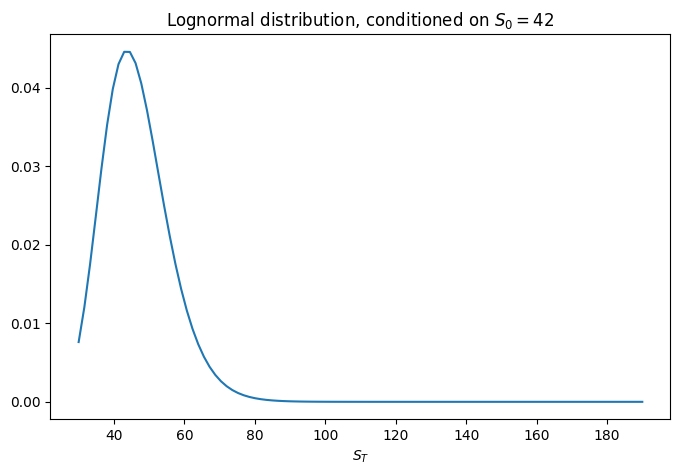

In [27]:
plt.figure(figsize=(8, 5))
x = np.linspace(30, 190, 100)
plt.plot(x, log_normal(x, e_ret, vol))
plt.title("Lognormal distribution, conditioned on $S_0=42$")
plt.xlabel("$S_T$")
plt.show()

In [16]:
def integrand_LN(S, strike, e_ret, vol, payoff):
    if payoff == "call":
        return (S - strike) * ss.lognorm.pdf(S, vol, scale=np.exp(e_ret))
    elif payoff == "put":
        return (strike - S) * ss.lognorm.pdf(S, vol, scale=np.exp(e_ret))


call = quad(integrand_LN, K, np.inf, args=(K, e_ret, vol, "call"))[0] * np.exp(-r * T)
put = quad(integrand_LN, 0, K, args=(K, e_ret, vol, "put"))[0] * np.exp(-r * T)

print("Call price: {} \nPut price: {} ".format(call, put))

Call price: 6.837071647101223 
Put price: 1.030568368539596 


The put option payoff $(K-S_T)^+$ is positive for $S_T < K$.    
- In the call case, the integration is from $K$ to $\infty$.
- In the put case, the integration is from $0$ to $K$.

### Utilizing the Change of Measure in Black-Scholes Model

By employing the change of measure previously introduced, we can simplify the integration process involved in option pricing. Let us compute the probabilities $\tilde{\mathbb{Q}}( S_T > K )$ and $\mathbb{Q}( S_T > K )$ under this new measure.

#### Computing $\tilde{\mathbb{Q}}( S_T > K )$

Under the measure $\tilde{\mathbb{Q}}$, the dynamics of the stock price are governed by:

$$\begin{aligned}
 \frac{dS_t}{S_t} &= (r+\sigma^2) dt + \sigma d\tilde{W}_t 
\end{aligned}$$

The probability $\tilde{\mathbb{Q}}( S_T > K )$ can be computed by considering the distribution of $S_T$ under $\tilde{\mathbb{Q}}$. Specifically, we have:

$$\begin{aligned}
\tilde{\mathbb{Q}}( S_T > K ) &= \tilde{\mathbb{Q}}\left( \frac{dS_t}{S_t} > \frac{K}{S_t} \right) \\
&= \tilde{\mathbb{Q}}\left( \log(S_T) > \log(K) \right) \\
&= \tilde{\mathbb{Q}}\left( (r+\sigma^2)T + \sigma \tilde{W}_T > \log(K/S_t) \right) \\
&= \tilde{\mathbb{Q}}\left( \tilde{W}_T > \frac{\log(K/S_t) - (r+\sigma^2)T}{\sigma} \right) \\
&= 1 - N\left( \frac{\log(K/S_t) - (r+\sigma^2)T}{\sigma \sqrt{T}} \right)
\end{aligned}$$

#### Computing $\mathbb{Q}( S_T > K )$

Similarly, under the original measure $\mathbb{Q}$, the probability $\mathbb{Q}( S_T > K )$ can be computed as:

$$\begin{aligned}
\mathbb{Q}( S_T > K ) &= \mathbb{Q}\left( \log(S_T) > \log(K) \right) \\
&= \mathbb{Q}\left( (r-\frac{\sigma^2}{2})T + \sigma W_T > \log(K/S_t) \right) \\
&= \mathbb{Q}\left( W_T > \frac{\log(K/S_t) - (r-\frac{\sigma^2}{2})T}{\sigma} \right) \\
&= 1 - N\left( \frac{\log(K/S_t) - (r-\frac{\sigma^2}{2})T}{\sigma \sqrt{T}} \right)
\end{aligned}$$

By utilizing the change of measure, we have simplified the computation of these probabilities, which are crucial for the valuation of options in the Black-Scholes framework.


In [17]:
# expected return of the log-price under the new measure
e_ret_1 = np.log(S0) + (r + 0.5 * sig**2) * T

Q1 = quad(lambda S: ss.lognorm.pdf(S, vol, scale=np.exp(e_ret_1)), K, np.inf)[0]
print("Risk neutral probability under stock numeraire,\n Q1 =", Q1)
Q2 = quad(lambda S: ss.lognorm.pdf(S, vol, scale=np.exp(e_ret)), K, np.inf)[0]
print("Risk neutral probability under money market numeraire,\n Q2 =", Q2)

print("BS call price: ", S0 * Q1 - K * np.exp(-r * T) * Q2)

Risk neutral probability under stock numeraire,
 Q1 = 0.8006515561983657
Risk neutral probability under money market numeraire,
 Q2 = 0.7401963374641727
BS call price:  6.83707164710113


### Black-Scholes Formula and Monte Carlo Method

In practice, the Black-Scholes formula for option pricing is often computed using $N(d_1)$ and $N(d_2)$, where $N$ denotes the cumulative distribution function of the standard normal distribution. This is mainly because the cumulative normal function is readily accessible in many computational libraries. For example, in the `BS_pricer` class, we use the `scipy.stats.norm.cdf` function to calculate these values.

#### Log-Normal Distribution and Normal Cumulative Function

It is important to note that if $X_T$ is a normal random variable, then $S_T = S_0 e^{X_T}$ follows a log-normal distribution. Consequently, we have:

$$ \mathbb{Q}( S_T > K ) = \mathbb{Q}\left( S_0 e^{X_T} > K \right) = \mathbb{Q}\left( X_T > \log \frac{K}{S_0} \right). $$

This relationship allows us to use the normal cumulative function for computing the probability that the option finishes in the money.

### Monte Carlo Method for Option Pricing

To simulate the stochastic process for the stock price, we generate random variables:

$$ S_T^i = S_0 e^{(r -\frac{1}{2}\sigma^2)T + \sigma W_{T}^i} $$

for $1 \leq i \leq N$, where $N$ is the number of simulations.

For a call option, the approximation of the expected payoff is given by:

$$ \mathbb{E}^{\mathbb{Q}}\left[ (S_T - K)^+ \mid S_0 \right] \approx \frac{1}{N} \sum_{i=1}^N (S_T^i - K)^+ $$

Similarly, for a put option, we use the payoff function $(K - S_T)^+$ within the expectation to approximate the option's value.


In [18]:
np.random.seed(seed=44)  # seed for random number generation
N = 10000000  # Number of random variables

W = ss.norm.rvs((r - 0.5 * sig**2) * T, np.sqrt(T) * sig, N)
S_T = S0 * np.exp(W)

call = np.mean(np.exp(-r * T) * np.maximum(S_T - K, 0))
put = np.mean(np.exp(-r * T) * np.maximum(K - S_T, 0))
call_err = ss.sem(np.exp(-r * T) * np.maximum(S_T - K, 0))  # standard error
put_err = ss.sem(np.exp(-r * T) * np.maximum(K - S_T, 0))  # standard error

In [19]:
print("Call price: {}, with error: {}".format(call, call_err))
print("Put price: {}, with error: {}".format(put, put_err))

Call price: 6.83407234753606, with error: 0.0022912103088302913
Put price: 1.031059096943445, with error: 0.0007347139492772956


 let's have a look at the prices obtained by different pricing methods:

In [20]:
# Creates the object with the parameters of the option
opt_param = Option_param(S0=100, K=100, T=1, exercise="European", payoff="call")
# Creates the object with the parameters of the process
diff_param = Diffusion_process(r=0.1, sig=0.2)
# Creates the pricer object
BS = BS_pricer(opt_param, diff_param)

In [21]:
BS.closed_formula()

13.269676584660893

In [22]:
BS.Fourier_inversion()

13.269676584660623

In [23]:
BS.MC(N=30000000, Err=True, Time=True)
# output is: price, standard error and execution time

(array([13.26753511]), array([0.00294085]), 1.4938249588012695)

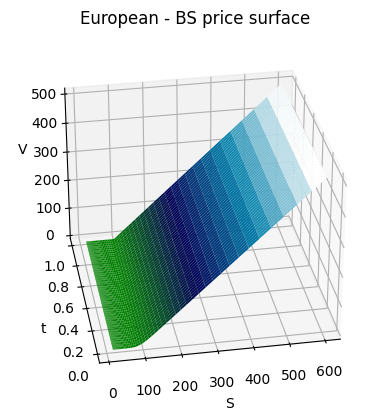

In [24]:
BS.mesh_plt()  # PDE method

<a id='sec4'></a>
## Binomial tree
The binomial option pricing model values options using an iterative approach utilizing multiple periods to value American options.
With the model, there are two possible outcomes with each iteration—a move up or a move down that follow a binomial tree.
The model is intuitive and is used more frequently in practice than the well-known Black-Scholes model.

Here, I present an efficient implementation:

In [25]:
N = 15000  # number of periods or number of time steps
payoff = "call"  # payoff

dT = float(T) / N  # Delta t
u = np.exp(sig * np.sqrt(dT))  # up factor
d = 1.0 / u  # down factor

V = np.zeros(N + 1)  # initialize the price vector

# price S_T at time T
S_T = np.array([(S0 * u**j * d ** (N - j)) for j in range(N + 1)])

a = np.exp(r * dT)  # risk free compounded return
p = (a - d) / (u - d)  # risk neutral up probability
q = 1.0 - p  # risk neutral down probability

if payoff == "call":
    V[:] = np.maximum(S_T - K, 0.0)
else:
    V[:] = np.maximum(K - S_T, 0.0)

for i in range(N - 1, -1, -1):
    # the price vector is overwritten at each step
    V[:-1] = np.exp(-r * dT) * (p * V[1:] + q * V[:-1])

print("BS Tree Price: ", V[0])

BS Tree Price:  6.837043047719591


<a id='sec5'></a>
## Limits of the model

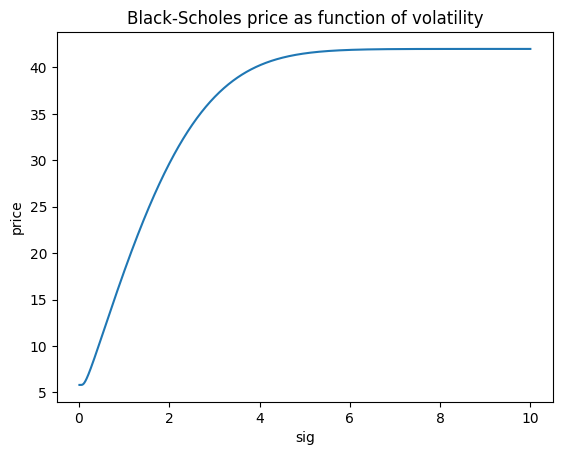

In [26]:
BS_sigma = partial(BS_pricer.BlackScholes, "call", S0, K, T, r)  # binding the function
sigmas = np.linspace(0.01, 10, 1000)

plt.plot(sigmas, BS_sigma(sigmas))
plt.xlabel("sig")
plt.ylabel("price")
plt.title("Black-Scholes price as function of volatility")
plt.show()

### Volatility and the Black-Scholes Formula

One notable characteristic of the Black-Scholes formula is that it is an increasing function of the volatility parameter. This means that as the volatility of the underlying asset increases, the value of the option also increases.

However, it is observed that for higher volatilities, the rate of increase in the option's value diminishes, and the graph of the option price versus volatility becomes almost flat. This behavior suggests that there is a diminishing sensitivity of the option price to changes in volatility as the volatility becomes very high.
